In [13]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import os
from scipy.optimize import curve_fit
import B00_codes.dataReader as dr
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import math
import json

NO_MS_EQUALS_1 = 0
Q_FINAL = 1
THREE_PI_HALF_FINAL = 2
REF_MINUS_SIG  =3

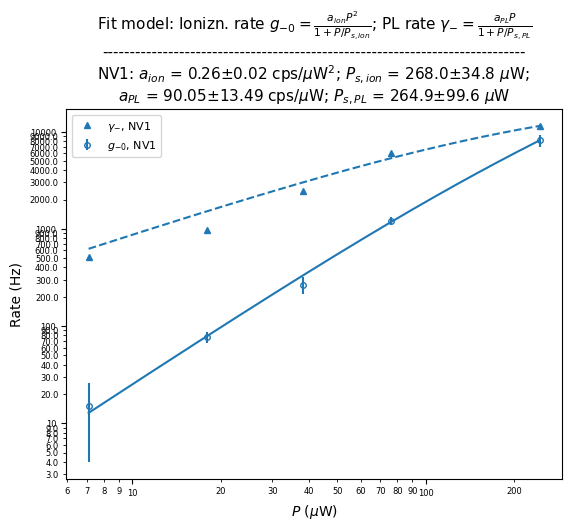

In [18]:
fig, ax = plt.subplots()

p = np.array((    7.1,   76.2,  244,   38.3,  18))               # 38.5 0.251 0.036 1.71
g = np.array((    0.015, 1.203, 8.109, 0.267, 0.0763))*1e3       # 18.5 0.065 0.02 0.966
err_g = np.array((0.011, 0.105, 1.214, 0.052, 0.0096))*1e3
# gamma = np.array(()) # sig-ref
gamma = np.array((0.508, 6.039, 11.331, 2.46, 0.966))*1e3 # sig

popt, pcov = curve_fit(dr.saturationQuad, p, g, p0=(1e4,50))
perr = np.sqrt(np.diag(pcov))
pfit = np.linspace(p.min(), p.max(), 1001)
gfit = dr.saturationQuad(pfit, *popt)
a_str = "NV1: $a_{ion}$ = %.2f$\pm$%.2f cps/$\mu$W$^2$; " % (popt[0], perr[0])
Ps_str = "$P_{s,ion}$ = %.1f$\pm$%.1f $\mu$W; " % (popt[1], perr[1])

popt2, pcov2 = curve_fit(dr.saturation, p, gamma, p0=(1e4,50))
perr2 = np.sqrt(np.diag(pcov2))
pfit = np.linspace(p.min(), p.max(), 1001)
gammafit = dr.saturation(pfit, *popt2)
aPL_str = "$a_{PL}$ = %.2f$\pm$%.2f cps/$\mu$W; "  % (popt2[0]/popt2[1], 
                                                      np.abs((popt2[0]*perr2[1]-popt2[1]*perr2[0]))/popt2[1]**2)
PsPL_str = "$P_{s,PL}$ = %.1f$\pm$%.1f $\mu$W" % (popt2[1], perr2[1])

markersize = 4; labelsize=6
plot1 = ax.errorbar(p,g,err_g,color='C0', label="$g_{-0}$, NV1", linestyle='', marker='o', markerfacecolor='none', markersize=markersize)
plot2 = ax.plot(p,gamma, '^', color='C0', label="$\gamma_{-}$, NV1",markersize=markersize)
plot3 = ax.plot(pfit, gfit, color='C0')
plot4 = ax.plot(pfit, gammafit, color='C0', linestyle='--')

ax.set_yscale('log')
ax.set_xscale('log')

plt.tick_params(axis='x', which='minor', labelsize=labelsize)
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
plt.tick_params(axis='x', which='major', labelsize=labelsize)
ax.xaxis.set_major_formatter(FormatStrFormatter("%.0f"))
plt.tick_params(axis='y', which='minor', labelsize=labelsize)
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
plt.tick_params(axis='y', which='major', labelsize=labelsize)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))

ax.set_xlabel(r"$P$ ($\mu$W)")
ax.set_ylabel(r"Rate (Hz)")
ax.set_title(r"Fit model: Ionizn. rate $g_{-0} = \frac{a_{ion} P^2}{1+P/P_{s,ion}}$; " + 
             r"PL rate $\gamma_{-} = \frac{a_{PL} P}{1+P/P_{s,PL}}$"+"\n"+ "-----------------------------------------------------------------------------" +"\n" +
             a_str + Ps_str + "\n" + aPL_str + PsPL_str, fontsize=11)
ax.legend(fontsize=8)